In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [5]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

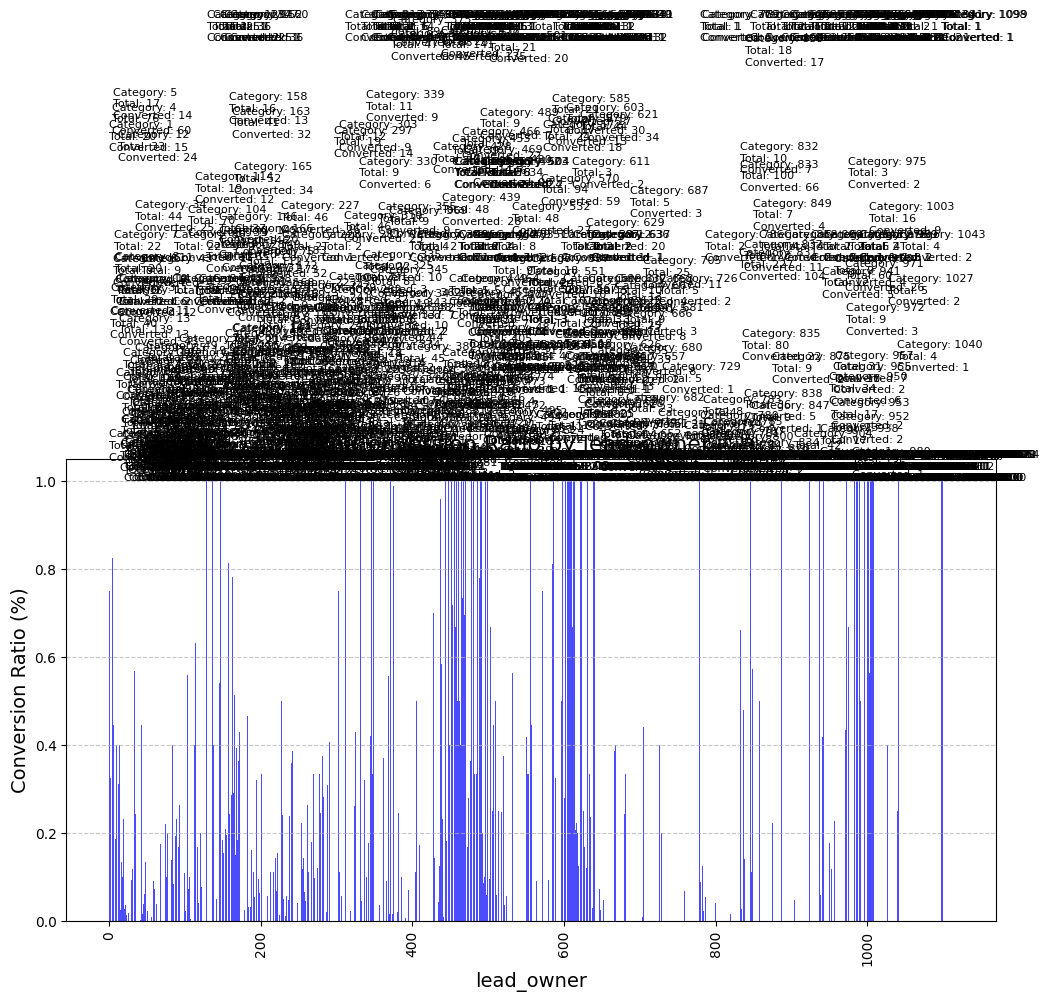

In [68]:
df_lead_owner = df.dropna(subset=['lead_owner'])

converted_counts_lead_owner = df_lead_owner.groupby('lead_owner')['is_converted'].sum().reset_index()
total_counts_lead_owner = df_lead_owner.groupby('lead_owner')['is_converted'].count().reset_index()

ratio_df_lead_owner = pd.merge(converted_counts_lead_owner, total_counts_lead_owner, on='lead_owner', how='left')
ratio_df_lead_owner['conversion_ratio'] = ratio_df_lead_owner['is_converted_x'] / ratio_df_lead_owner['is_converted_y']

for index, row in ratio_df_lead_owner.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    # print(f"{row['lead_owner']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

plt.figure(figsize=(12, 6))
bars = plt.bar(ratio_df_lead_owner['lead_owner'], ratio_df_lead_owner['conversion_ratio'], color='blue', alpha=0.7)

# Display category names, total counts, and converted counts on the bars
for bar, total, converted, category in zip(bars, ratio_df_lead_owner['is_converted_y'], ratio_df_lead_owner['is_converted_x'], ratio_df_lead_owner['lead_owner']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'Category: {category}\nTotal: {total}\nConverted: {converted}', fontsize=8, color='black')

plt.title('Conversion Ratio by lead_owner', fontsize=16)
plt.xlabel('lead_owner', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [72]:
top10_lead_owners = ratio_df_lead_owner.sort_values(by='is_converted_y', ascending=False).head(10)
for index, row in top10_lead_owners.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['lead_owner']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

174.0 별 is_converted 비율: 0.97%, 전체 갯수: 4627, is_converted된 갯수: 45
175.0 별 is_converted 비율: 0.00%, 전체 갯수: 4120, is_converted된 갯수: 0
97.0 별 is_converted 비율: 0.00%, 전체 갯수: 2499, is_converted된 갯수: 0
23.0 별 is_converted 비율: 1.26%, 전체 갯수: 2453, is_converted된 갯수: 31
194.0 별 is_converted 비율: 0.00%, 전체 갯수: 2208, is_converted된 갯수: 0
42.0 별 is_converted 비율: 0.25%, 전체 갯수: 1215, is_converted된 갯수: 3
96.0 별 is_converted 비율: 0.00%, 전체 갯수: 981, is_converted된 갯수: 0
185.0 별 is_converted 비율: 0.91%, 전체 갯수: 880, is_converted된 갯수: 8
363.0 별 is_converted 비율: 0.00%, 전체 갯수: 839, is_converted된 갯수: 0
115.0 별 is_converted 비율: 2.18%, 전체 갯수: 734, is_converted된 갯수: 16
